In [89]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import scipy.stats as sts
from scipy import linalg
import random as random
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('ggplot')

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [90]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
raitings

array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
       [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
       [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
       [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
       [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
       [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
       [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
       [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
       [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
       [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [108]:
from scipy import spatial

def cos_matrix(size, matrix):
    distances = np.zeros((size, size))
    M_u = matrix.mean(axis=1)
    m_sub = matrix - M_u[:,None]
    for first in range(0, size):
        for second in range(0, size):
            distance = spatial.distance.cosine(m_sub[first],m_sub[second])
            distances[first, second] = distance
    return distances

user_similarity = cos_matrix(10, raitings)

users = []
users_ = []

user_similarity = user_similarity.tolist()
n = 0

for i in range(10):
    users.append(user_similarity[0+n].index(min(user_similarity[0+n])) + 1)
    users_.append(user_similarity[0+n].index(max(user_similarity[0+n])) + 1)
    print(users[0+n], users_[0+n])
    n += 1

1 7
2 10
3 7
4 5
5 4
6 1
7 3
8 10
9 4
10 2


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [92]:
pca = PCA(n_components = 5)
pca.fit_transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [93]:
sy.init_printing()
x = sy.Symbol('x')

def f(x):
    return (sy.tan(sy.sin(x) + sy.cos(2*x + 3)))**2

In [94]:
def df(x):
    return sy.diff(f(x), x)
df(x)

In [95]:
df(x).subs(x, 1)

In [96]:
import math

def result():
    return 2 * (1 + math.tan(math.cos(5) + math.sin(1))**2) * (math.cos(1) - 2*math.sin(5)) * math.tan(math.cos(5) + math.sin(1))

result()

In [97]:
from numpy import sin, cos, tan
from scipy.misc import derivative

def g(x):
    return (tan(sin(x) + cos(2*x + 3)))**2

derivative(g, 1.0, n = 1, dx=1e-6)

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [39]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [40]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [41]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

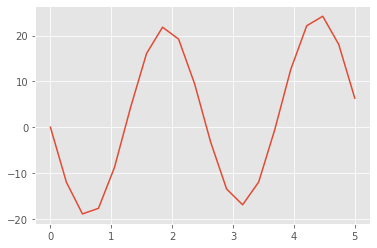

In [42]:
plt.plot(x, fx)
plt.show()

In [43]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))


In [44]:
from scipy.optimize import differential_evolution

In [45]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, recombination=0.9, mutation=0.1, seed=42)
result

     fun: 1.5099704695487048e-06
 message: 'Optimization terminated successfully.'
    nfev: 483
     nit: 13
 success: True
       x: array([ 3. , -2.5])

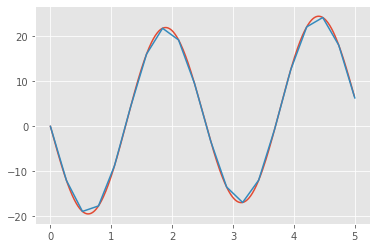

In [62]:
x_ = np.arange(0,5, 0.01)
fx_ = [ f(i, 3, -2.5) for i in x_]
plt.plot(x_, fx_)
plt.plot(x, fx)
plt.show()

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [34]:
rv = [random.randint(0, 1000) for x in range(1000)]
means = []

for x in range(1000): 
    sample = random.sample(rv, 50)
    mean = sum(sample) / 50
    means.append(mean)

In [35]:
means

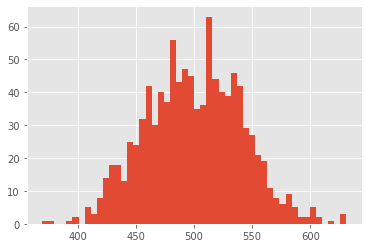

In [99]:
plt.hist(means, bins = 50)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

$\left|\begin{matrix}
1-\lambda & 4 \\
1 & 1-\lambda
\end{matrix}\right| = 
\lambda^2-2\cdot\lambda-3=(\lambda+1)\cdot(\lambda-3)$

$\lambda_1=-1\\
\lambda_2=3$

$
 V_1 = \begin{cases}
   (1+1) \cdot x_1 + 4 \cdot x_2 = 0\\
   x_1 + (1 + 1) \cdot x_2 = 0
 \end{cases}
$

$V_1 = \begin{cases}
   -2\\
   1
 \end{cases}$

$
V_2 = \begin{cases}
   (1-3) \cdot x_1 + 4 \cdot x_2 = 0\\
   x_1 + (1 - 3) \cdot x_2 = 0
 \end{cases}
$

$V_2 = \begin{cases}
   2\\
   1
 \end{cases}$

In [63]:
n = np.array([[1, 4], [1, 1]])
i, k = linalg.eig(n)
for l in range(len(i)):
    print("Собственное значение " + str(i[l]))
for l in range(len(i)):
    print("Cобственный вектор " + str(k[:,l]))

Собственное значение (3.0000000000000004+0j)
Собственное значение (-0.9999999999999996+0j)
Cобственный вектор [0.89442719 0.4472136 ]
Cобственный вектор [-0.89442719  0.4472136 ]
